(np.float64(-0.5), np.float64(153.5), np.float64(83.5), np.float64(-0.5))

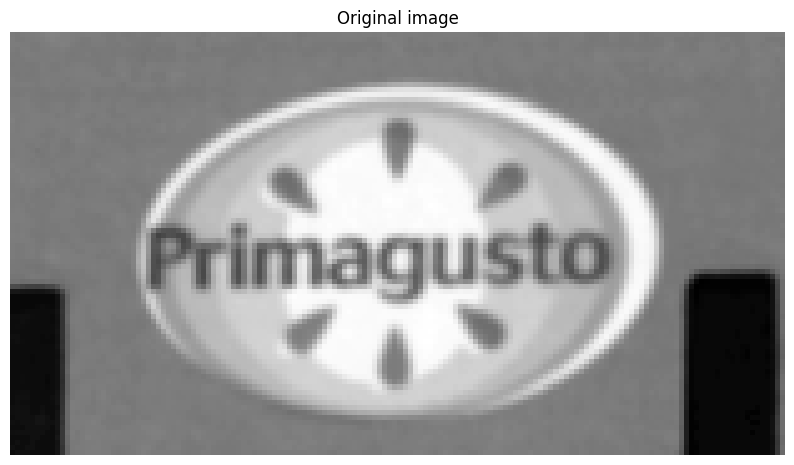

In [1]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt



# Cargar imagen

# Get the current working directory
baseFolder = os.getcwd()

# Define the folder containing the images
folder = os.path.join(baseFolder, "photos", "diffDefect")

# Read the image in grayscale
img = cv.imread(os.path.join(folder, "15.png"), 0)


# We load the camera calibration results (We took the photos with the first camera setup)
cameraParameters = np.load(baseFolder + "/calibration/camera_setup1.npz")

# We extract the camera matrix and distortion coefficients, through the keys in the dictionary
mtx = cameraParameters['mtx']
dist = cameraParameters['dist']
res = cameraParameters['res']


# We find the dimensions of the image
h, w = img.shape[:2]

# We find the new camera matrix and interested region
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# We undistort the image
udst_img = cv.undistort(img, mtx, dist, None, newcameramtx)

# We crop the image using the ROI
x_r, y_r, w_r, h_r = roi
udst_crop_img = udst_img[y_r:y_r+h_r, x_r:x_r+w_r]



# The images are shown
plt.figure(figsize=(10, 14))
plt.imshow(udst_crop_img, cmap='grey')
plt.title("Original image")
plt.axis("off")



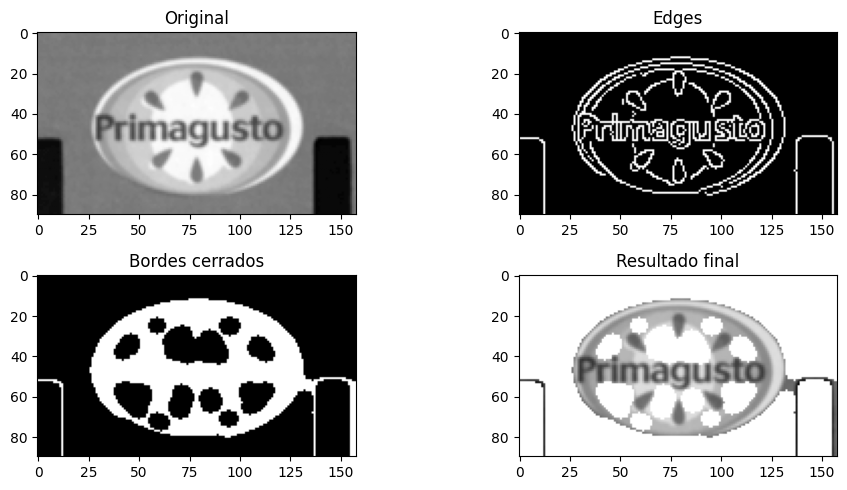

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt



# Cargar imagen

# Get the current working directory
baseFolder = os.getcwd()

# Define the folder containing the images
folder = os.path.join(baseFolder, "photos", "diffDefect")

# Read the image in grayscale
img = cv.imread(os.path.join(folder, "15.png"), 0)

# 2. Aplicar Canny para detectar bordes
edges = cv2.Canny(img, 40, 100)

# 3. Cerrar bordes para que formen una elipse cerrada
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# 4. Rellenar los bordes cerrados para crear una máscara
# Invertimos la imagen para encontrar región interna
inv = cv2.bitwise_not(closed_edges)
_, thresh = cv2.threshold(inv, 254, 255, cv2.THRESH_BINARY)

# Rellenar usando flood fill desde un punto exterior
h, w = img.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
flooded = thresh.copy()
cv2.floodFill(flooded, mask, (0, 0), 255)
flooded_inv = cv2.bitwise_not(flooded)

# 5. Crear máscara final (solo la región del óvalo oscuro)
final_mask = flooded_inv

# 6. Aplicar máscara: todo fuera del óvalo se pone blanco
result = img.copy()
result[final_mask == 0] = 255

# 7. Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.subplot(2, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edges")
plt.subplot(2, 2, 3)
plt.imshow(closed_edges, cmap='gray')
plt.title("Bordes cerrados")
plt.subplot(2, 2, 4)
plt.imshow(result, cmap='gray')
plt.title("Resultado final")
plt.tight_layout()
plt.show()


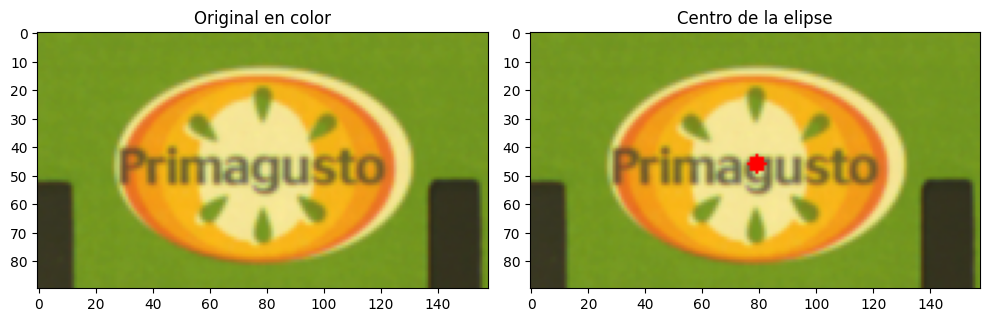

In [3]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

# Cargar imagen
baseFolder = os.getcwd()
folder = os.path.join(baseFolder, "photos", "diffDefect")

# Imagen en color y en gris
img_color = cv.imread(os.path.join(folder, "15.png"))
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

# 1. Bordes con Canny
edges = cv.Canny(img_gray, 40, 100)

# 2. Cierre morfológico
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
closed_edges = cv.morphologyEx(edges, cv.MORPH_CLOSE, kernel)

# 3. Invertir y umbralizar
inv = cv.bitwise_not(closed_edges)
_, thresh = cv.threshold(inv, 254, 255, cv.THRESH_BINARY)

# 4. Flood fill para rellenar región interior
h, w = img_gray.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
flooded = thresh.copy()
cv.floodFill(flooded, mask, (0, 0), 255)
flooded_inv = cv.bitwise_not(flooded)

# 5. Máscara final
final_mask = flooded_inv

# 6. Aplicar máscara
result = img_gray.copy()
result[final_mask == 0] = 255

# 7. Encontrar el mayor contorno de la elipse
contours, _ = cv.findContours(final_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
max_contour = max(contours, key=cv.contourArea)

# 8. Calcular centroide del contorno mayor
M = cv.moments(max_contour)
if M["m00"] != 0:
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])
else:
    cx, cy = 0, 0  # Evita división por cero

# 9. Dibujar círculo rojo en imagen color
output_img = img_color.copy()
cv.circle(output_img, (cx, cy), 3, (0, 0, 255), -1)

# 10. Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
plt.title("Original en color")
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(output_img, cv.COLOR_BGR2RGB))
plt.title("Centro de la elipse")
plt.tight_layout()
plt.show()


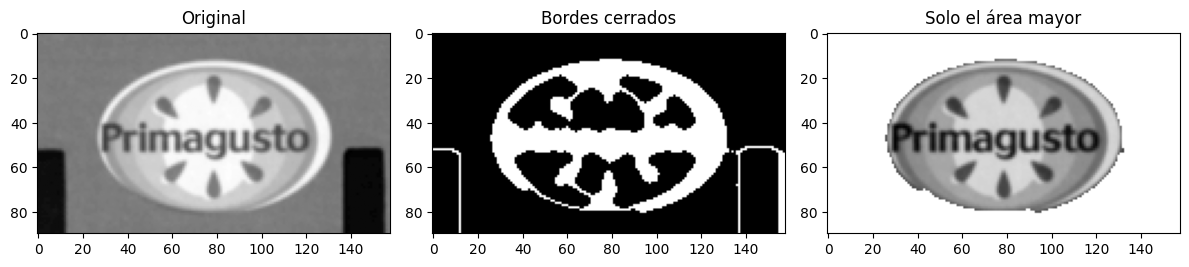

In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt



# Cargar imagen

# Get the current working directory
baseFolder = os.getcwd()

# Define the folder containing the images
folder = os.path.join(baseFolder, "photos", "diffDefect")

# Read the image in grayscale
img = cv.imread(os.path.join(folder, "15.png"), 0)

# 2. Detectar bordes con Canny
edges = cv2.Canny(img, 50, 150)

# 3. Cerrar huecos para asegurar contornos cerrados
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# 4. Encontrar todos los contornos
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 5. Buscar el contorno con el área máxima
max_contour = max(contours, key=cv2.contourArea)

# 6. Crear máscara con solo ese contorno
mask = np.zeros_like(img)
cv2.drawContours(mask, [max_contour], -1, 255, thickness=cv2.FILLED)

# 7. Aplicar la máscara a la imagen original (lo que no está en la máscara se vuelve blanco)
result = img.copy()
result[mask == 0] = 255

# 8. Mostrar resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.subplot(1, 3, 2)
plt.imshow(closed, cmap='gray')
plt.title("Bordes cerrados")
plt.subplot(1, 3, 3)
plt.imshow(result, cmap='gray')
plt.title("Solo el área mayor")
plt.tight_layout()
plt.show()

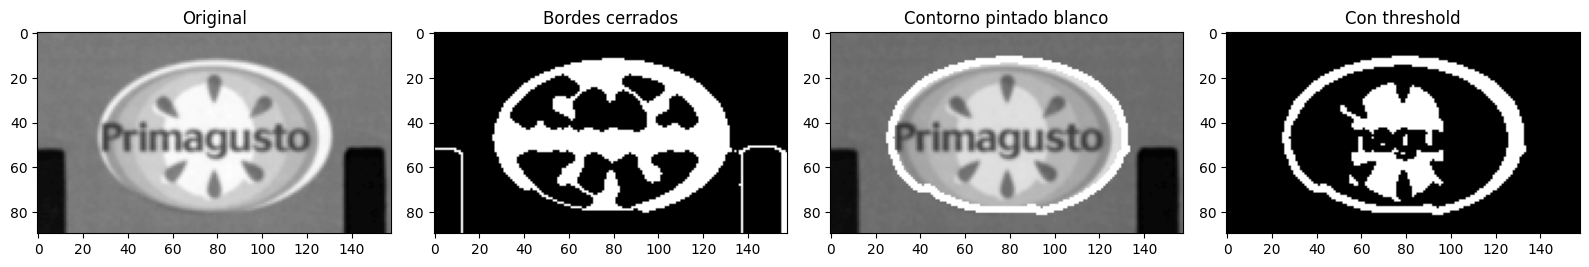

In [14]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt



# Cargar imagen

# Get the current working directory
baseFolder = os.getcwd()

# Define the folder containing the images
folder = os.path.join(baseFolder, "photos", "diffDefect")

# Read the image in grayscale
img = cv.imread(os.path.join(folder, "15.png"), 0)

# 2. Detectar bordes con Canny
edges = cv2.Canny(img, 50, 150)

# 3. Cerrar huecos para asegurar contornos cerrados
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# 4. Encontrar todos los contornos
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 5. Buscar el contorno con el área máxima
max_contour = max(contours, key=cv2.contourArea)

# 6. Crear máscara y dibujar solo el borde del contorno más grande
mask = np.zeros_like(img)
cv2.drawContours(mask, [max_contour], -1, 255, thickness=2)  # Solo borde, no relleno

# 7. Pintar el borde en blanco en la imagen original
result = img.copy()
result[mask == 255] = 255  # Pintar el borde de blanco

# 8. Aplicar un umbral si deseas borrar el borde blanco (opcional)
_, thresholded = cv.threshold(result, 200, 255, cv.THRESH_BINARY)

#cv2.threshold(result, 254, 255, cv2.THRESH_BINARY_INV)  # Borrar borde blanco si es necesario

# 9. Mostrar resultados
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.subplot(1, 4, 2)
plt.imshow(closed, cmap='gray')
plt.title("Bordes cerrados")
plt.subplot(1, 4, 3)
plt.imshow(result, cmap='gray')
plt.title("Contorno pintado blanco")
plt.subplot(1, 4, 4)
plt.imshow(thresholded, cmap='gray')
plt.title("Con threshold")
plt.tight_layout()
plt.show()

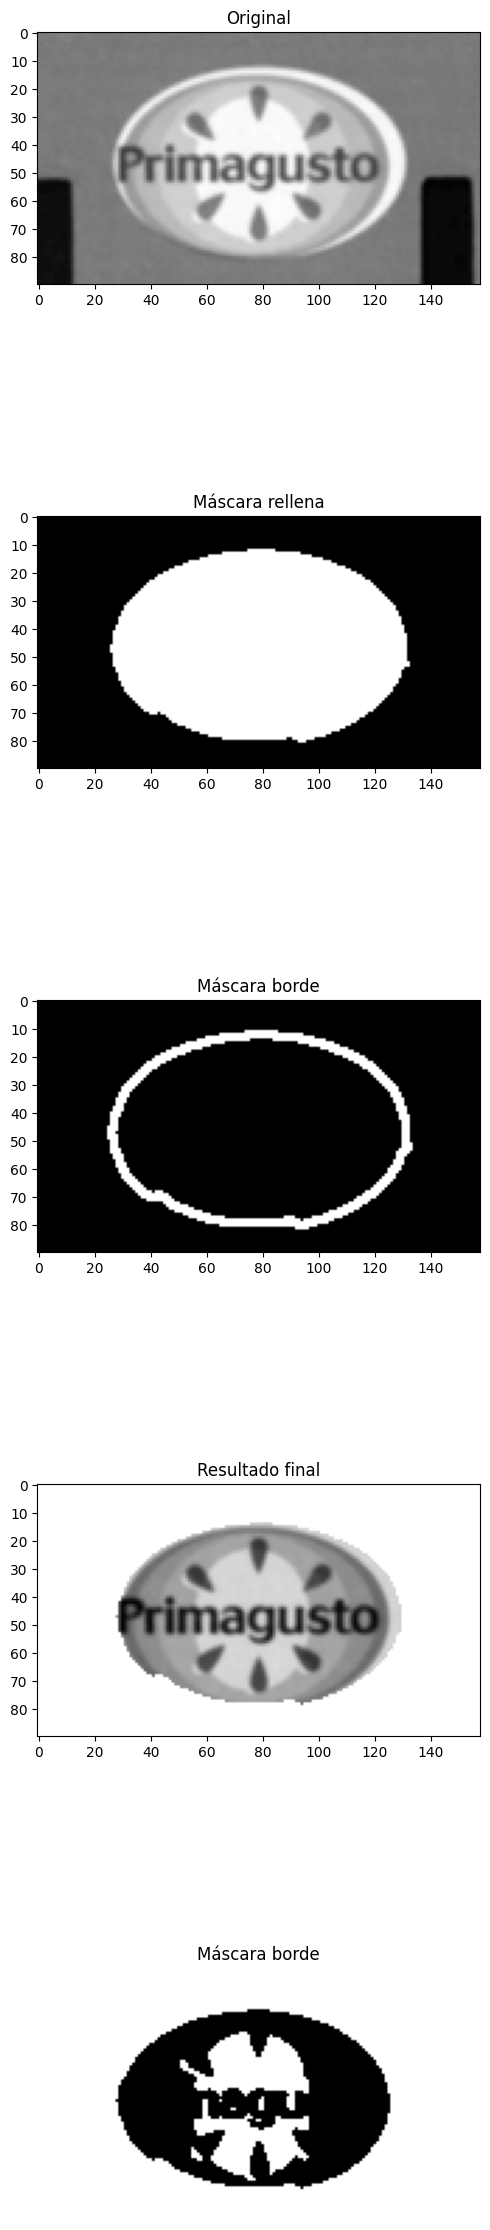

In [20]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt



# Cargar imagen

# Get the current working directory
baseFolder = os.getcwd()

# Define the folder containing the images
folder = os.path.join(baseFolder, "photos", "diffDefect")

# Read the image in grayscale
img = cv.imread(os.path.join(folder, "15.png"), 0)

# 2. Detectar bordes con Canny
edges = cv2.Canny(img, 50, 150)

# 3. Cerrar huecos para asegurar contornos cerrados
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# 4. Encontrar todos los contornos
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 5. Buscar el contorno con el área máxima
max_contour = max(contours, key=cv2.contourArea)

# 6. Crear máscara del contorno relleno (para conservar solo el interior)
filled_mask = np.zeros_like(img)
cv2.drawContours(filled_mask, [max_contour], -1, 255, thickness=cv2.FILLED)

# 7. Crear otra máscara solo con el borde (sin rellenar)
border_mask = np.zeros_like(img)
cv2.drawContours(border_mask, [max_contour], -1, 255, thickness=2)

# 8. Crear la imagen resultado
result = img.copy()

# Pintar el borde en blanco
result[border_mask == 255] = 255

# Pintar todo lo que está fuera del contorno relleno en blanco
result[filled_mask == 0] = 255

# 8. Aplicar un umbral si deseas borrar el borde blanco (opcional)
_, thresholded = cv.threshold(result, 200, 255, cv.THRESH_BINARY)

# 9. Mostrar resultados
plt.figure(figsize=(5, 25))
plt.subplot(5, 1, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.subplot(5, 1, 2)
plt.imshow(filled_mask, cmap='gray')
plt.title("Máscara rellena")
plt.subplot(5, 1, 3)
plt.imshow(border_mask, cmap='gray')
plt.title("Máscara borde")
plt.subplot(5, 1, 4)
plt.imshow(result, cmap='gray')
plt.title("Resultado final")
plt.subplot(5, 1, 5)
plt.imshow(thresholded, cmap='gray')
plt.title("Máscara borde")
plt.tight_layout()
plt.axis("off")
plt.show()

No se detectaron letras


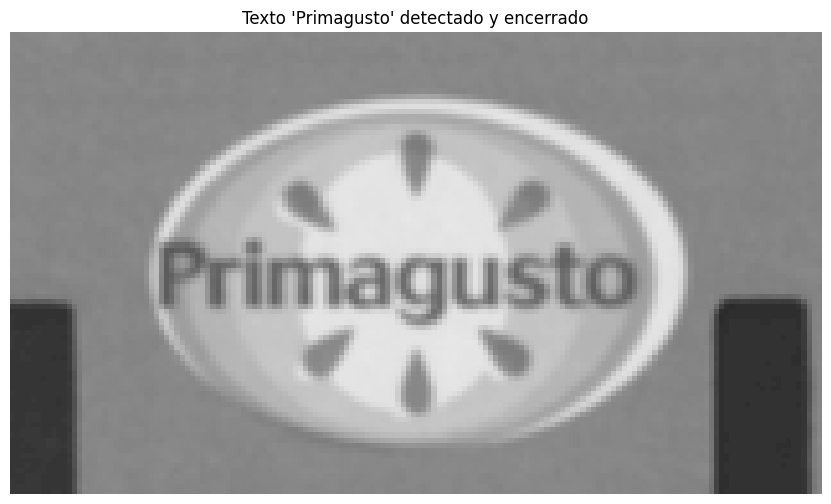

In [5]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

# ------------------------------------------
# Paso 1: Aplicar la máscara para aislar solo el óvalo
isolated = cv.bitwise_and(img, img, mask=final_mask)

# Paso 2: Umbral inverso para resaltar las letras oscuras
_, binary_letters = cv.threshold(isolated, 100, 255, cv.THRESH_BINARY_INV)

# Paso 3: Morfología para limpiar letras
kernel = cv.getStructuringElement(cv.MORPH_RECT, (2, 2))
cleaned_letters = cv.morphologyEx(binary_letters, cv.MORPH_OPEN, kernel)

# Paso 4: Encontrar contornos
contours, _ = cv.findContours(cleaned_letters, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Paso 5: Filtrar por área y aspecto para aislar letras
letter_boxes = []
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    area = cv.contourArea(cnt)
    aspect = w / float(h)
    if 20 < area < 1000 and 0.2 < aspect < 2.5:
        letter_boxes.append((x, y, w, h))

# Paso 6: Dibujar bounding box general si se detectan letras
output_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
if letter_boxes:
    x_min = min([x for x, y, w, h in letter_boxes])
    y_min = min([y for x, y, w, h in letter_boxes])
    x_max = max([x + w for x, y, w, h in letter_boxes])
    y_max = max([y + h for x, y, w, h in letter_boxes])

    cv.rectangle(output_img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
else:
    print("No se detectaron letras")

# Mostrar resultado
plt.figure(figsize=(12, 6))
plt.imshow(cv.cvtColor(output_img, cv.COLOR_BGR2RGB))
plt.title("Texto 'Primagusto' detectado y encerrado")
plt.axis("off")
plt.show()

